In [5]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame()
for file in os.listdir('results_final/'):
    if file.endswith('.json'):
        path = 'results_final/' + file
    
    with open(path) as f:
        data = json.load(f)
    
    df_temp = pd.DataFrame([data])
    df_temp["name"] = os.path.splitext(os.path.basename(path))[0]
    df = pd.concat([df, df_temp], ignore_index=True)
    
#usun "type_Classifier" z kolumny name
df['name'] = df['name'].str.replace('type_Classifier_', '')

df


,conf_matrix_train,accuracy_train,conf_matrix_test,accuracy_test,name
0,"[[3588, 133, 67], [66, 3545, 116], [108, 167, ...",0.943344,"[[731, 61, 106], [42, 780, 146], [109, 185, 649]]",0.770557,smileGradientTreeBoost_numberOfTrees_50
1,"[[3782, 7, 2], [3, 3720, 9], [11, 9, 3718]]",0.996359,"[[724, 69, 98], [40, 775, 135], [106, 189, 649]]",0.772891,smileRandomForest_numberOfTrees_200
2,"[[3714, 55, 22], [34, 3653, 45], [57, 48, 3633]]",0.976368,"[[730, 65, 96], [38, 776, 136], [104, 190, 650]]",0.775386,smileGradientTreeBoost_numberOfTrees_200
3,"[[3777, 12, 2], [6, 3710, 16], [14, 24, 3700]]",0.992877,"[[727, 70, 101], [46, 766, 139], [103, 178, 648]]",0.773429,smileRandomForest_numberOfTrees_100
4,"[[3758, 24, 12], [16, 3707, 21], [24, 52, 3592]]",0.988012,"[[728, 68, 91], [43, 776, 126], [105, 183, 655]]",0.772546,smileRandomForest_numberOfTrees_50
5,"[[3354, 190, 247], [249, 3138, 345], [329, 446...",0.839623,"[[700, 73, 115], [99, 689, 156], [134, 191, 614]]",0.722844,smileKNN_k_3
6,"[[3639, 103, 49], [53, 3583, 96], [81, 116, 35...",0.955808,"[[733, 66, 98], [42, 766, 137], [105, 199, 648]]",0.771993,smileGradientTreeBoost_numberOfTrees_100
7,"[[3792, 2, 0], [5, 3736, 3], [9, 2, 3640]]",0.998224,"[[727, 69, 95], [40, 775, 135], [107, 187, 650]]",0.772711,smileRandomForest_numberOfTrees_500


In [7]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Funkcja do obliczania metryk dla 3 klas
def calculate_metrics_sklearn(conf_matrix):
    print(conf_matrix)
    conf_matrix = np.array(conf_matrix)
    
    # Konwersja macierzy konfuzji do list etykiet rzeczywistych i predykowanych
    true_labels = np.repeat(range(3), conf_matrix.sum(axis=1))
    pred_labels = np.concatenate([np.full(conf_matrix[i, j], j) for i in range(3) for j in range(3)])

    if len(true_labels) == 0 or len(pred_labels) == 0:
        return 0, 0, 0  # Obsługa pustych wartości

    # Obliczenie precision, recall i F1-macro przy użyciu sklearn
    precision, recall, f1_macro, _ = precision_recall_fscore_support(
        true_labels, pred_labels, average="macro", zero_division=0
    )
    report = classification_report(true_labels, pred_labels, zero_division=0)
    print(report)
    return precision, recall, f1_macro

# Obliczenie metryk dla całego DataFrame
df[["precision_train", "recall_train", "f1_macro_train"]] = df["conf_matrix_train"].apply(lambda cm: calculate_metrics_sklearn(cm)).apply(pd.Series)
df[["precision_test", "recall_test", "f1_macro_test"]] = df["conf_matrix_test"].apply(lambda cm: calculate_metrics_sklearn(cm)).apply(pd.Series)

df




[[3588, 133, 67], [66, 3545, 116], [108, 167, 3454]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3788
           1       0.92      0.95      0.94      3727
           2       0.95      0.93      0.94      3729

    accuracy                           0.94     11244
   macro avg       0.94      0.94      0.94     11244
weighted avg       0.94      0.94      0.94     11244

[[3782, 7, 2], [3, 3720, 9], [11, 9, 3718]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3791
           1       1.00      1.00      1.00      3732
           2       1.00      0.99      1.00      3738

    accuracy                           1.00     11261
   macro avg       1.00      1.00      1.00     11261
weighted avg       1.00      1.00      1.00     11261

[[3714, 55, 22], [34, 3653, 45], [57, 48, 3633]]
              precision    recall  f1-score   support

           0       0.98      0.98    

,conf_matrix_train,accuracy_train,conf_matrix_test,accuracy_test,name,precision_train,recall_train,f1_macro_train,precision_test,recall_test,f1_macro_test
0,"[[3588, 133, 67], [66, 3545, 116], [108, 167, ...",0.943344,"[[731, 61, 106], [42, 780, 146], [109, 185, 649]]",0.770557,smileGradientTreeBoost_numberOfTrees_50,0.941803,0.941541,0.941543,0.769781,0.769348,0.769200
1,"[[3782, 7, 2], [3, 3720, 9], [11, 9, 3718]]",0.996359,"[[724, 69, 98], [40, 775, 135], [106, 189, 649]]",0.772891,smileRandomForest_numberOfTrees_200,0.996360,0.996353,0.996356,0.772751,0.771953,0.771582
2,"[[3714, 55, 22], [34, 3653, 45], [57, 48, 3633]]",0.976368,"[[730, 65, 96], [38, 776, 136], [104, 190, 650]]",0.775386,smileGradientTreeBoost_numberOfTrees_200,0.976851,0.976810,0.976818,0.775595,0.774902,0.774505
3,"[[3777, 12, 2], [6, 3710, 16], [14, 24, 3700]]",0.992877,"[[727, 70, 101], [46, 766, 139], [103, 178, 648]]",0.773429,smileRandomForest_numberOfTrees_100,0.993427,0.993415,0.993417,0.771687,0.770856,0.770841
4,"[[3758, 24, 12], [16, 3707, 21], [24, 52, 3592]]",0.988012,"[[728, 68, 91], [43, 776, 126], [105, 183, 655]]",0.772546,smileRandomForest_numberOfTrees_50,0.986758,0.986636,0.986677,0.779265,0.778833,0.778215
5,"[[3354, 190, 247], [249, 3138, 345], [329, 446...",0.839623,"[[700, 73, 115], [99, 689, 156], [134, 191, 614]]",0.722844,smileKNN_k_3,0.839318,0.839411,0.839088,0.722344,0.724016,0.722821
6,"[[3639, 103, 49], [53, 3583, 96], [81, 116, 35...",0.955808,"[[733, 66, 98], [42, 766, 137], [105, 199, 648]]",0.771993,smileGradientTreeBoost_numberOfTrees_100,0.955848,0.955759,0.955759,0.769928,0.769474,0.768852
7,"[[3792, 2, 0], [5, 3736, 3], [9, 2, 3640]]",0.998224,"[[727, 69, 95], [40, 775, 135], [107, 187, 650]]",0.772711,smileRandomForest_numberOfTrees_500,0.998143,0.998108,0.998124,0.774047,0.773429,0.772983


In [8]:
df[["name", "precision_train", "recall_train", "f1_macro_train", "accuracy_train", "precision_test", "recall_test", "f1_macro_test", "accuracy_test"]].sort_values(by="f1_macro_test", ascending=False).round(2)

,name,precision_train,recall_train,f1_macro_train,accuracy_train,precision_test,recall_test,f1_macro_test,accuracy_test
4,smileRandomForest_numberOfTrees_50,0.99,0.99,0.99,0.99,0.78,0.78,0.78,0.77
2,smileGradientTreeBoost_numberOfTrees_200,0.98,0.98,0.98,0.98,0.78,0.77,0.77,0.78
7,smileRandomForest_numberOfTrees_500,1.00,1.00,1.00,1.00,0.77,0.77,0.77,0.77
1,smileRandomForest_numberOfTrees_200,1.00,1.00,1.00,1.00,0.77,0.77,0.77,0.77
3,smileRandomForest_numberOfTrees_100,0.99,0.99,0.99,0.99,0.77,0.77,0.77,0.77
0,smileGradientTreeBoost_numberOfTrees_50,0.94,0.94,0.94,0.94,0.77,0.77,0.77,0.77
6,smileGradientTreeBoost_numberOfTrees_100,0.96,0.96,0.96,0.96,0.77,0.77,0.77,0.77
5,smileKNN_k_3,0.84,0.84,0.84,0.84,0.72,0.72,0.72,0.72


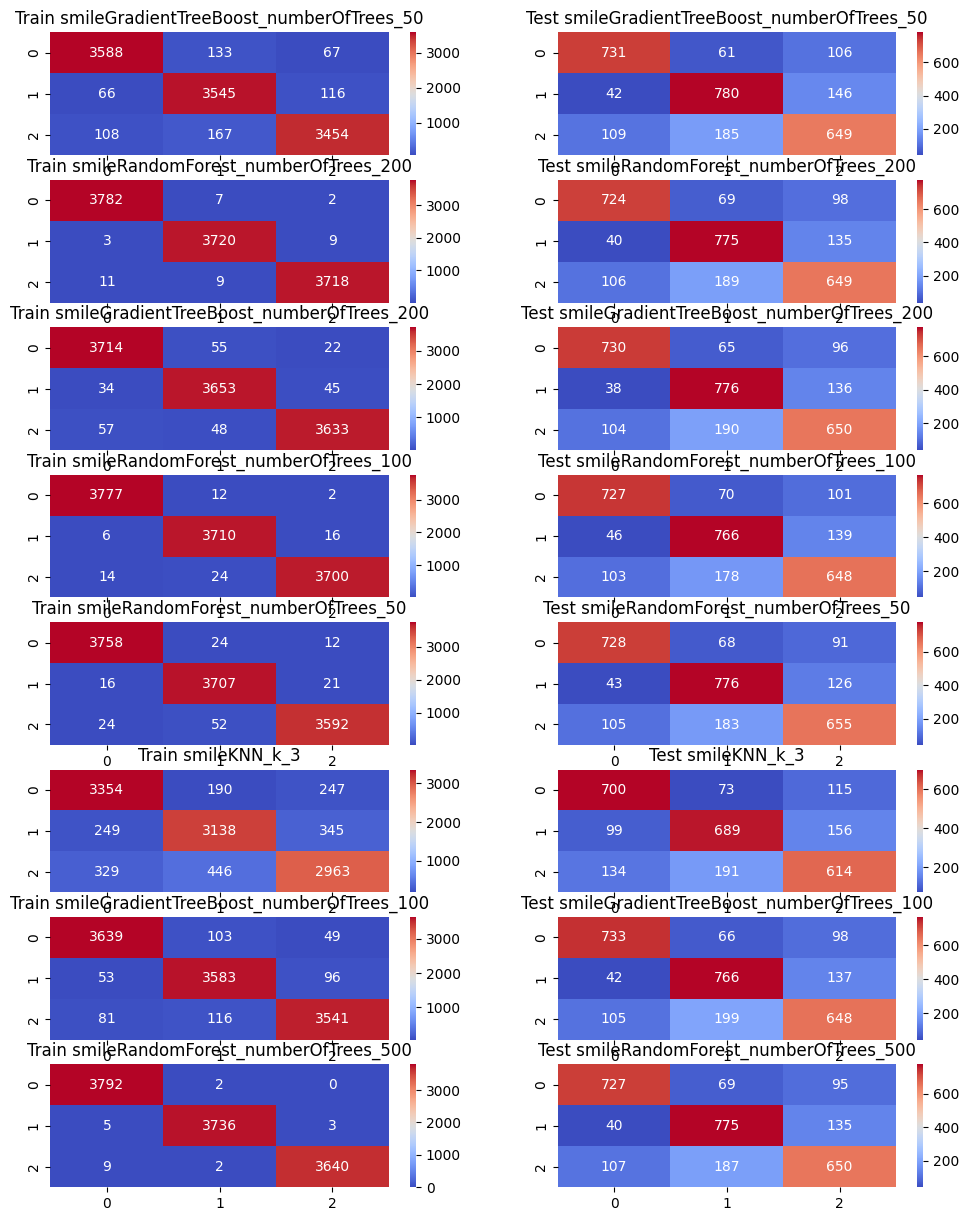

In [9]:
fig, ax = plt.subplots(len(df), 2, figsize=(12, 15))
axes = ax.flatten()
for i in range(len(df)):
    sns.heatmap(df["conf_matrix_train"][i], annot=True, fmt="d", cmap=sns.color_palette("coolwarm", as_cmap=True), ax=axes[2 * i])
    axes[2 * i].set_title(f"Train {df['name'][i]}")
    sns.heatmap(df["conf_matrix_test"][i], annot=True, fmt="d", cmap=sns.color_palette("coolwarm", as_cmap=True), ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f"Test {df['name'][i]}")
    
    